## Importacion de datos

In [5]:
!pip install tensorflow


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.reset_option("display.max_rows")
pd.set_option('display.max_columns', None)
filename = 'data_variables_objetivo.csv'

df = pd.read_csv(filename)
col = 'au_recuperacion'

In [29]:
df

,date_index,horas_operacion,toneladas,au_cabeza,ag_cabeza,pb_cabeza,zn_cabeza,fe_cabeza,cu_cabeza,au_concentrado_pb,ag_concentrado_pb,pb_concentrado_pb,zn_concentrado_pb,fe_concentrado_pb,cu_concentrado_pb,au_colas_pb,ag_colas_pb,pb_colas_pb,zn_colas_pb,fe_colas_pb,cu_colas_pb,au_concentrado_zn,ag_concentrado_zn,pb_concentrado_zn,zn_concentrado_zn,fe_concentrado_zn,cu_concentrado_zn,au_colas_zn,ag_colas_zn,pb_colas_zn,zn_colas_zn,fe_colas_zn,cu_colas_zn,au_concentrado_fe,ag_concentrado_fe,pb_concentrado_fe,zn_concentrado_fe,fe_concentrado_fe,cu_concentrado_fe,au_colas_fe,ag_colas_fe,pb_colas_fe,zn_colas_fe,fe_colas_fe,cu_colas_fe,au_recuperacion,ag_recuperacion,pb_recuperacion,zn_recuperacion,fe_recuperacion,au_contenido,ag_contenido,pb_contenido,zn_contenido,ag_concentrado_pb_ley,pb_concentrado_pb_ley,zn_concentrado_pb_ley,ag_concentrado_zn_ley,zn_concentrado_zn_ley,au_concentrado_fe_ley,ag_concentrado_fe_ley,fe_concentrado_fe_ley
0,2024-01-02_1,12.0,2042.20,0.991981,395.810002,0.806986,0.656214,5.784357,0.027701,23.439805,14143.800961,29.299741,10.118122,9.951662,0.713295,0.457145,68.253954,0.128125,0.430777,5.685068,0.011367,0.455007,65.414671,0.125637,0.298823,5.673291,0.010442,2.496992,640.014986,0.749494,3.604855,34.256666,0.067930,0.391205,47.461214,0.106145,0.195526,4.780200,0.008646,0.33,47.46,0.16,0.160,5.73,0.01,62.742370,88.671662,84.492474,79.873091,17.481809,1.271050,716.753600,13.924589,46.362309,14143.800961,29.299741,10.118122,1189.957338,52.561161,2.496992,640.014986,34.256666
1,2024-01-02_2,12.0,2042.20,1.088931,350.599999,0.779781,1.942134,5.381652,0.035221,31.055118,13517.780309,33.099183,8.520401,8.610519,0.666944,0.456001,72.489921,0.097148,1.803191,5.313453,0.021878,0.385025,38.749333,0.068131,0.143392,5.113240,0.009058,2.338633,639.049666,0.818290,3.051206,34.827484,0.070041,0.413376,47.460866,0.079018,0.185590,5.544452,0.009943,0.33,47.46,0.16,0.160,5.73,0.01,63.721450,87.063149,87.799272,83.971925,-8.975060,1.205204,530.177258,11.891555,28.326183,13517.780309,33.099183,8.520401,919.398482,43.465123,2.338633,639.049666,34.827484
2,2024-01-03_1,12.0,1955.00,1.294525,386.740000,1.170457,1.901957,6.033765,0.038873,29.936189,11565.332135,38.355623,9.486405,8.607234,0.649314,0.487999,71.960020,0.123353,1.688385,5.961299,0.021683,0.421861,44.211708,0.099727,0.168639,5.803291,0.009481,2.371649,639.476068,0.797413,3.139364,34.757763,0.070050,0.432495,47.458215,0.103533,0.184841,5.961206,0.009812,0.33,47.46,0.16,0.160,5.73,0.01,68.335607,88.369640,89.749758,77.982038,-2.977630,1.729435,668.142257,20.536926,28.996267,11565.332135,38.355623,9.486405,943.354408,49.413741,2.371649,639.476068,34.757763
3,2024-01-03_2,12.0,2068.40,1.320697,308.410002,1.032803,1.801547,5.784384,0.031786,37.388892,10725.032307,38.863268,10.561065,9.165881,0.762832,0.440757,54.280130,0.109869,1.587845,5.701887,0.013951,0.400794,33.320482,0.092689,0.128628,5.555102,0.010760,2.264858,639.625521,0.818287,2.900139,34.573644,0.071213,0.444263,47.459247,0.109609,0.193258,6.231802,0.008937,0.33,47.46,0.16,0.160,5.73,0.01,67.360786,85.068780,89.615372,79.272610,-13.524190,1.840114,542.666720,19.144081,29.539510,10725.032307,38.863268,10.561065,750.772639,50.077870,2.264858,639.625521,34.573644
4,2024-01-04_1,12.0,1857.10,1.378503,286.739996,1.032243,2.139257,5.631025,0.042235,37.887393,9050.180473,38.046329,10.878103,8.377537,0.808961,0.465431,67.569943,0.106535,1.920702,5.562335,0.023059,0.378647,33.900568,0.077828,0.141789,5.331825,0.008772,2.296030,639.566745,0.825265,2.837456,34.677839,0.069847,0.421571,47.459353,0.094561,0.202136,5.988782,0.010139,0.33,47.46,0.16,0.160,5.73,0.01,70.736983,84.162377,89.931045,81.392765,-13.191936,1.810879,448.168735,17.239580,32.335838,9050.180473,38.046329,10.878103,852.150337,43.373812,2.296030,639.566745,34.677839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [31]:
def cargar_y_preparar_datos(filename, columna_valor, columna_indice='fecha_turno'):
    """
    Carga los datos, procesa el índice para agrupar por fecha
    y promediar los valores de los dos turnos.
    """
    try:
        # Intenta cargar asumiendo que la primera columna es el índice
        df = pd.read_csv(filename, index_col=0, parse_dates=False)
        # Si la columna índice tiene un nombre específico y no es la primera:
        # df = pd.read_csv(filename)
        # df = df.set_index(columna_indice)

        serie = df[columna_valor].copy()
    except FileNotFoundError:
        print(f"Error: El archivo '{filename}' no fue encontrado.")
        return None
    except KeyError:
        print(f"Error: La columna '{columna_valor}' o '{columna_indice}' no se encontró en el archivo.")
        print(f"Columnas disponibles: {df.columns.tolist()}")
        return None

    # Extraer la parte de la fecha del índice actual
    serie.index = serie.index.astype(str) # Asegurar que el índice es string
    fecha_sin_turno = serie.index.str.split('_').str[0]

    # Agrupar por la nueva fecha y calcular la media
    serie_agrupada = serie.groupby(fecha_sin_turno).mean()

    # Convertir el nuevo índice a formato datetime
    serie_agrupada.index = pd.to_datetime(serie_agrupada.index)

    # Ordenar por fecha, por si acaso
    serie_agrupada = serie_agrupada.sort_index()

    print("Datos cargados y procesados:")
    print(serie_agrupada.head())
    print(f"\nLongitud de la serie procesada: {len(serie_agrupada)}")
    print(f"Fecha de inicio: {serie_agrupada.index.min()}")
    print(f"Fecha de fin: {serie_agrupada.index.max()}")
    return serie_agrupada

In [33]:
# --- Ejecución del Análisis ---
filename = 'data_variables_objetivo.csv'
columna_a_analizar = 'au_recuperacion'

# Cargar y preparar los datos
serie_procesada = cargar_y_preparar_datos(filename, columna_a_analizar)

Datos cargados y procesados:
date_index
2024-01-02    63.231910
2024-01-03    67.848197
2024-01-04    68.064518
2024-01-05    70.081209
2024-01-06    69.025061
Name: au_recuperacion, dtype: float64

Longitud de la serie procesada: 421
Fecha de inicio: 2024-01-02 00:00:00
Fecha de fin: 2025-03-31 00:00:00


In [35]:
def generar_caracteristicas_temporales(df_entrada, nombre_columna_objetivo,
                                       num_lags=14, # Dado que pronosticas t+14
                                       ventanas_rolling=[3, 5, 7, 14], # Ventanas para estadísticas móviles
                                       periodo_estacional_principal=7):
    """
    Genera un conjunto comprensivo de características para una serie temporal.

    Args:
        df_entrada (pd.DataFrame): DataFrame con un DatetimeIndex y la columna objetivo.
        nombre_columna_objetivo (str): El nombre de la columna de la variable objetivo.
        num_lags (int): Número de características de lag a crear.
        ventanas_rolling (list): Lista de tamaños de ventana para estadísticas móviles.
        periodo_estacional_principal (int): El periodo estacional principal (ej. 7 para semanal).

    Returns:
        pd.DataFrame: DataFrame con la columna objetivo original y las características añadidas.
    """
    if not isinstance(df_entrada.index, pd.DatetimeIndex):
        raise ValueError("El DataFrame de entrada debe tener un DatetimeIndex.")

    df = df_entrada.copy()
    serie_objetivo = df[nombre_columna_objetivo]

    # 1. Características de Lag (Valores Rezagados)
    # Estos usan valores pasados de la serie objetivo.
    for i in range(1, num_lags + 1):
        df[f'lag_{i}'] = serie_objetivo.shift(i)

    # 2. Características de Ventana Móvil (Rolling Window Features)
    # Usamos .shift(1) para asegurar que estas estadísticas se calculan usando datos
    # hasta el periodo anterior, evitando fuga de datos si se predice el valor actual.
    for ventana in ventanas_rolling:
        df[f'rolling_mean_{ventana}'] = serie_objetivo.rolling(window=ventana, min_periods=1).mean().shift(1)
        df[f'rolling_std_{ventana}'] = serie_objetivo.rolling(window=ventana, min_periods=1).std().shift(1)
        df[f'rolling_min_{ventana}'] = serie_objetivo.rolling(window=ventana, min_periods=1).min().shift(1)
        df[f'rolling_max_{ventana}'] = serie_objetivo.rolling(window=ventana, min_periods=1).max().shift(1)

    # 3. Características Basadas en Fecha/Tiempo
    df['dia_semana'] = df.index.dayofweek  # Lunes=0, Domingo=6
    df['dia_mes'] = df.index.day
    df['dia_ano'] = df.index.dayofyear
    df['mes'] = df.index.month
    df['trimestre'] = df.index.quarter
    df['semana_iso'] = df.index.isocalendar().week.astype(int) # Semana ISO del año
    df['ano'] = df.index.year

    # Crear variables dummy (one-hot encoding) para el día de la semana
    # drop_first=False para mantener todas las categorías, útil para árboles de decisión.
    # Para modelos lineales, drop_first=True puede ser preferible para evitar multicolinealidad.
    df_dow_dummies = pd.get_dummies(df['dia_semana'], prefix='dia_sem', drop_first=False)
    df = pd.concat([df, df_dow_dummies], axis=1)

    # (Opcional) Crear variables dummy para el mes
    # df_mes_dummies = pd.get_dummies(df['mes'], prefix='mes_num', drop_first=False)
    # df = pd.concat([df, df_mes_dummies], axis=1)


    # 4. Características de Fourier para la Estacionalidad Semanal (periodo_estacional_principal=7)
    # Estas ayudan a modelar patrones cíclicos de forma suave.
    if periodo_estacional_principal == 7: # Específico para semanal
        # Usamos df['dia_semana'] (0-6) para el cálculo
        for k in range(1, (periodo_estacional_principal // 2) + 1): # Para periodo 7, k será 1, 2, 3
            df[f'sin_semanal_{k}'] = np.sin(2 * np.pi * k * df['dia_semana'] / periodo_estacional_principal)
            df[f'cos_semanal_{k}'] = np.cos(2 * np.pi * k * df['dia_semana'] / periodo_estacional_principal)
    # Podrías añadir términos genéricos de Fourier si sospechas otros periodos no ligados al calendario.

    # 5. Característica de Tendencia (índice de tiempo simple)
    df['tendencia_idx'] = np.arange(len(df.index))

    # 6. Características de Momentum / Tasa de Cambio
    df['diff_1'] = serie_objetivo.diff(periods=1) # Diferencia con el día anterior
    if periodo_estacional_principal > 1:
        # Diferencia con el mismo día de la semana anterior (para periodo 7)
        df[f'diff_estacional_{periodo_estacional_principal}'] = serie_objetivo.diff(periods=periodo_estacional_principal)
    
    # Tu característica de momentum original (diferencia de 4 periodos)
    df['momentum_custom_4'] = serie_objetivo - serie_objetivo.shift(4)

    # (Opcional: Si quieres re-incluir RSI)
    # df['rsi_56'] = compute_rsi(serie_objetivo, window=56)
    
    # Nota: Muchas características creadas (lags, rolling, diffs) introducirán NaNs
    # al principio del DataFrame. Estos deben ser manejados (ej. eliminar filas o imputar)
    # antes de entrenar un modelo.
    print("Generación de características completada.")
    print(f"Forma del DataFrame original: {df_entrada.shape}, Forma del DataFrame con características: {df.shape}")
    numero_nans_estimado = max(num_lags, max(ventanas_rolling, default=0) if ventanas_rolling else 0)
    print(f"Se introducirán NaNs al inicio (aprox. {numero_nans_estimado} filas o más).")
    print("Considera usar df.head(), df.tail() y df.info() para inspeccionar el resultado.")
    
    return df

In [37]:
# Asumiendo que 'serie_procesada' es tu Serie de Pandas diaria
# y 'columna_a_analizar' es 'pb_recuperacion'
df_para_features = serie_procesada.to_frame(name=columna_a_analizar)

In [39]:
if 'df_para_features' in locals() and df_para_features is not None:
    df_con_features = generar_caracteristicas_temporales(
        df_entrada=df_para_features,
        nombre_columna_objetivo=columna_a_analizar, # ej. 'pb_recuperacion'
        num_lags=5,              # Número de lags (ej. para predecir t+14)
        ventanas_rolling=[3, 5, 7, 14], # Ventanas para medias/std móviles
        periodo_estacional_principal=7 # Estacionalidad semanal confirmada
    )

    print("\nPrimeras 20 filas del DataFrame con características (contiene NaNs al principio):")
    print(df_con_features.head(20))

    print("\nÚltimas 5 filas del DataFrame con características:")
    print(df_con_features.tail())

    print("\nInformación sobre el nuevo DataFrame:")
    df_con_features.info()

    #Antes de entrenar modelos, usualmente eliminarías las filas con NaNs
    df_final_para_modelo = df_con_features.dropna()
    print(f"\nForma después de eliminar NaNs: {df_final_para_modelo.shape}")
else:     
    print("Asegúrate de que 'serie_procesada' (convertida a DataFrame) esté disponible.")

Generación de características completada.
Forma del DataFrame original: (421, 1), Forma del DataFrame con características: (421, 46)
Se introducirán NaNs al inicio (aprox. 14 filas o más).
Considera usar df.head(), df.tail() y df.info() para inspeccionar el resultado.

Primeras 20 filas del DataFrame con características (contiene NaNs al principio):
            au_recuperacion      lag_1      lag_2      lag_3      lag_4  \
date_index                                                                
2024-01-02        63.231910        NaN        NaN        NaN        NaN   
2024-01-03        67.848197  63.231910        NaN        NaN        NaN   
2024-01-04        68.064518  67.848197  63.231910        NaN        NaN   
2024-01-05        70.081209  68.064518  67.848197  63.231910        NaN   
2024-01-06        69.025061  70.081209  68.064518  67.848197  63.231910   
2024-01-07        75.543426  69.025061  70.081209  68.064518  67.848197   
2024-01-08        75.444294  75.543426  69.02506

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 832 entries, 0 to 831
Data columns (total 62 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date_index             832 non-null    object 
 1   horas_operacion        832 non-null    float64
 2   toneladas              832 non-null    float64
 3   au_cabeza              832 non-null    float64
 4   ag_cabeza              832 non-null    float64
 5   pb_cabeza              832 non-null    float64
 6   zn_cabeza              832 non-null    float64
 7   fe_cabeza              832 non-null    float64
 8   cu_cabeza              832 non-null    float64
 9   au_concentrado_pb      832 non-null    float64
 10  ag_concentrado_pb      832 non-null    float64
 11  pb_concentrado_pb      832 non-null    float64
 12  zn_concentrado_pb      832 non-null    float64
 13  fe_concentrado_pb      832 non-null    float64
 14  cu_concentrado_pb      832 non-null    float64
 15  au_col

In [43]:
df_final_para_modelo

,au_recuperacion,lag_1,lag_2,lag_3,lag_4,lag_5,rolling_mean_3,rolling_std_3,rolling_min_3,rolling_max_3,rolling_mean_5,rolling_std_5,rolling_min_5,rolling_max_5,rolling_mean_7,rolling_std_7,rolling_min_7,rolling_max_7,rolling_mean_14,rolling_std_14,rolling_min_14,rolling_max_14,dia_semana,dia_mes,dia_ano,mes,trimestre,semana_iso,ano,dia_sem_0,dia_sem_1,dia_sem_2,dia_sem_3,dia_sem_4,dia_sem_5,dia_sem_6,sin_semanal_1,cos_semanal_1,sin_semanal_2,cos_semanal_2,sin_semanal_3,cos_semanal_3,tendencia_idx,diff_1,diff_estacional_7,momentum_custom_4
date_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2024-01-09,80.371067,75.444294,75.543426,69.025061,70.081209,68.064518,73.337594,3.735092,69.025061,75.543426,71.631702,3.597251,68.064518,75.543426,69.891231,4.386106,63.231910,75.543426,69.891231,4.386106,63.231910,75.543426,1,9,9,1,1,2,2024,False,True,False,False,False,False,False,0.781831,0.623490,0.974928,-0.222521,0.433884,-0.900969,7,4.926773,17.139157,10.289858
2024-01-12,70.202960,80.371067,75.444294,75.543426,69.025061,70.081209,77.119596,2.816293,75.444294,80.371067,74.093011,4.613088,69.025061,80.371067,72.339682,4.812200,67.848197,80.371067,71.201210,5.497092,63.231910,80.371067,4,12,12,1,1,2,2024,False,False,False,False,True,False,False,-0.433884,-0.900969,0.781831,0.623490,-0.974928,-0.222521,8,-10.168107,2.354763,1.177899
2024-01-13,70.650196,70.202960,80.371067,75.444294,75.543426,69.025061,75.339440,5.084864,70.202960,80.371067,74.117362,4.586865,69.025061,80.371067,72.676076,4.519285,68.064518,80.371067,71.090294,5.152814,63.231910,80.371067,5,13,13,1,1,2,2024,False,False,False,False,False,True,False,-0.974928,-0.222521,0.433884,-0.900969,0.781831,0.623490,9,0.447237,2.585678,-4.893229
2024-01-14,77.604795,70.650196,70.202960,80.371067,75.444294,75.543426,73.741408,5.745806,70.202960,80.371067,74.442389,4.174889,70.202960,80.371067,73.045459,4.171855,69.025061,80.371067,71.046284,4.860113,63.231910,80.371067,6,14,14,1,1,2,2024,False,False,False,False,False,False,True,-0.781831,0.623490,-0.974928,-0.222521,-0.433884,-0.900969,10,6.954598,7.523586,2.160501
2024-01-15,67.678286,77.604795,70.650196,70.202960,80.371067,75.444294,72.819317,4.150374,70.202960,77.604795,74.854662,4.406174,70.202960,80.371067,74.120257,4.249327,69.025061,80.371067,71.642512,5.016871,63.231910,80.371067,0,15,15,1,1,3,2024,True,False,False,False,False,False,False,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,11,-9.926508,-1.346775,-12.692781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-27,77.876858,79.322979,81.148922,78.672864,77.552260,82.643112,79.714922,1.283717,78.672864,81.148922,79.868027,2.026701,77.552260,82.643112,81.295395,3.453107,77.552260,87.983069,79.631540,4.569116,69.157752,87.983069,3,27,86,3,1,13,2025,False,False,False,True,False,False,False,0.433884,-0.900969,-0.781831,0.623490,0.974928,-0.222521,416,-1.446121,-10.106211,0.324599
2025-03-28,80.848055,77.876858,79.322979,81.148922,78.672864,77.552260,79.449586,1.639702,77.876858,81.148922,78.914776,1.427435,77.552260,81.148922,79.851651,1.996427,77.552260,82.643112,80.254333,3.501068,76.114836,87.983069,4,28,87,3,1,13,2025,False,False,False,False,True,False,False,-0.433884,-0.900969,0.781831,0.623490,-0.974928,-0.222521,417,2.971197,-0.896506,2.175191
2025-03-29,77.614213,80.848055,77.876858,79.322979,81.148922,78.672864,79.349297,1.485773,77.876858,80.848055,79.573936,1.401690,77.876858,81.148922,79.723579,1.880125,77.552260,82.643112,80.526868,3.377301,76.114836,87.983069,5,29,88,3,1,13,2025,False,False,False,False,False,True,False,-0.974928,-0.222521,0.433884,-0.900969,0.781831,0.623490,418,-3.233842,-5.028899,-3.534709


In [45]:
df.describe()

,horas_operacion,toneladas,au_cabeza,ag_cabeza,pb_cabeza,zn_cabeza,fe_cabeza,cu_cabeza,au_concentrado_pb,ag_concentrado_pb,pb_concentrado_pb,zn_concentrado_pb,fe_concentrado_pb,cu_concentrado_pb,au_colas_pb,ag_colas_pb,pb_colas_pb,zn_colas_pb,fe_colas_pb,cu_colas_pb,au_concentrado_zn,ag_concentrado_zn,pb_concentrado_zn,zn_concentrado_zn,fe_concentrado_zn,cu_concentrado_zn,au_colas_zn,ag_colas_zn,pb_colas_zn,zn_colas_zn,fe_colas_zn,cu_colas_zn,au_concentrado_fe,ag_concentrado_fe,pb_concentrado_fe,zn_concentrado_fe,fe_concentrado_fe,cu_concentrado_fe,au_colas_fe,ag_colas_fe,pb_colas_fe,zn_colas_fe,fe_colas_fe,cu_colas_fe,au_recuperacion,ag_recuperacion,pb_recuperacion,zn_recuperacion,fe_recuperacion,au_contenido,ag_contenido,pb_contenido,zn_contenido,ag_concentrado_pb_ley,pb_concentrado_pb_ley,zn_concentrado_pb_ley,ag_concentrado_zn_ley,zn_concentrado_zn_ley,au_concentrado_fe_ley,ag_concentrado_fe_ley,fe_concentrado_fe_ley
count,832.0,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,8.320000e+02,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000
mean,12.0,2045.604462,1.263661,492.728934,1.599283,2.901337,7.355301,0.047744,23.899875,11191.217624,41.468807,10.487379,8.122471,0.708864,0.493773,115.836465,0.228270,2.645398,7.333374,0.024970,0.445926,74.215536,0.172993,0.260350,7.154612,0.010776,2.367064,613.501096,0.723246,2.627922,34.951075,0.060023,0.346306,45.981782,0.145887,0.150829,5.702217,0.008416,0.338876,45.981947,0.161575,0.156088,5.720255,1.000000e-02,76.047837,91.443935,86.160379,79.439183,20.058465,1.957273,919.649982,27.936238,47.418125,11191.217624,41.468807,10.487379,857.988525,48.355446,2.367064,613.501096,34.951075
std,0.0,76.892943,0.249347,136.203572,0.411819,0.838970,0.963309,0.011343,5.606172,2179.315916,5.863075,2.050790,1.241460,0.205012,0.103162,35.378627,0.077251,0.829429,0.984434,0.006145,0.092777,21.365965,0.055770,0.100608,1.018153,0.000885,0.357949,142.368445,0.259054,1.223345,3.202669,0.016837,0.077900,11.334552,0.051203,0.056669,1.088999,0.000830,0.068046,11.335182,0.044864,0.053603,1.069113,1.596906e-16,5.775026,2.826820,4.318525,6.764634,13.354975,0.474221,278.037561,7.771596,15.877221,2179.315916,5.863075,2.050790,229.468445,5.265865,0.357949,142.368445,3.202669
min,12.0,1829.484575,0.574271,142.089998,0.487850,0.641128,4.790731,0.018812,10.469725,6147.698548,25.954200,5.389593,4.788938,0.170671,0.210737,50.747216,0.053074,0.393062,4.710141,0.010870,0.214618,33.320482,0.037677,0.049711,4.411151,0.008376,1.511991,228.488880,0.132359,0.323049,27.357693,0.017765,0.134230,19.239886,0.022680,0.006710,2.871967,0.006351,0.170000,19.240000,0.050000,0.010000,3.150000,1.000000e-02,60.144977,83.220968,73.782390,57.971659,-15.372139,0.641089,236.675607,6.145772,3.944207,6147.698548,25.954200,5.389593,369.033970,31.272086,1.511991,228.488880,27.357693
25%,12.0,2009.531688,1.086882,387.402500,1.296385,2.360639,6.722285,0.039328,20.056952,9631.397755,37.653607,9.210501,7.243897,0.567514,0.420771,88.822395,0.167685,2.108508,6.686365,0.022037,0.386036,58.657758,0.131436,0.177460,6.454168,0.010242,2.182179,514.182842,0.531867,1.692539,33.366196,0.048059,0.290709,38.600032,0.108640,0.105911,5.013814,0.007911,0.300000,38.600000,0.135000,0.110000,5.110000,1.000000e-02,72.251303,89.668017,83.581245,75.835343,11.209388,1.622721,708.753644,22.499273,37.100278,9631.397755,37.653607,9.210501,691.952505,45.646631,2.182179,514.182842,33.366196
50%,12.0,2042.200000,1.256049,485.910000,1.5

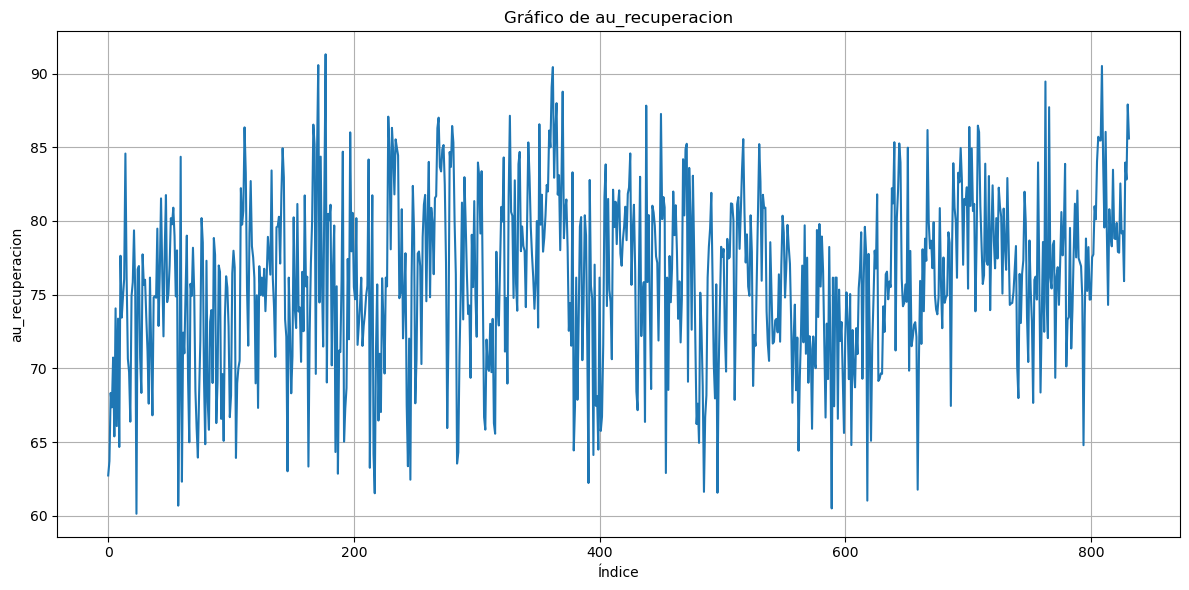

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt


# Graficamos la columna
df[col].plot(figsize=(12, 6), title=f"Gráfico de {col}")
plt.xlabel("Índice")
plt.ylabel(col)
plt.grid(True)
plt.tight_layout()
plt.show()

In [49]:
df_y = df[[col]]
df_y

,au_recuperacion
0,62.742370
1,63.721450
2,68.335607
3,67.360786
4,70.736983
...,...
827,75.920493
828,83.961391
829,82.811343
830,87.899513


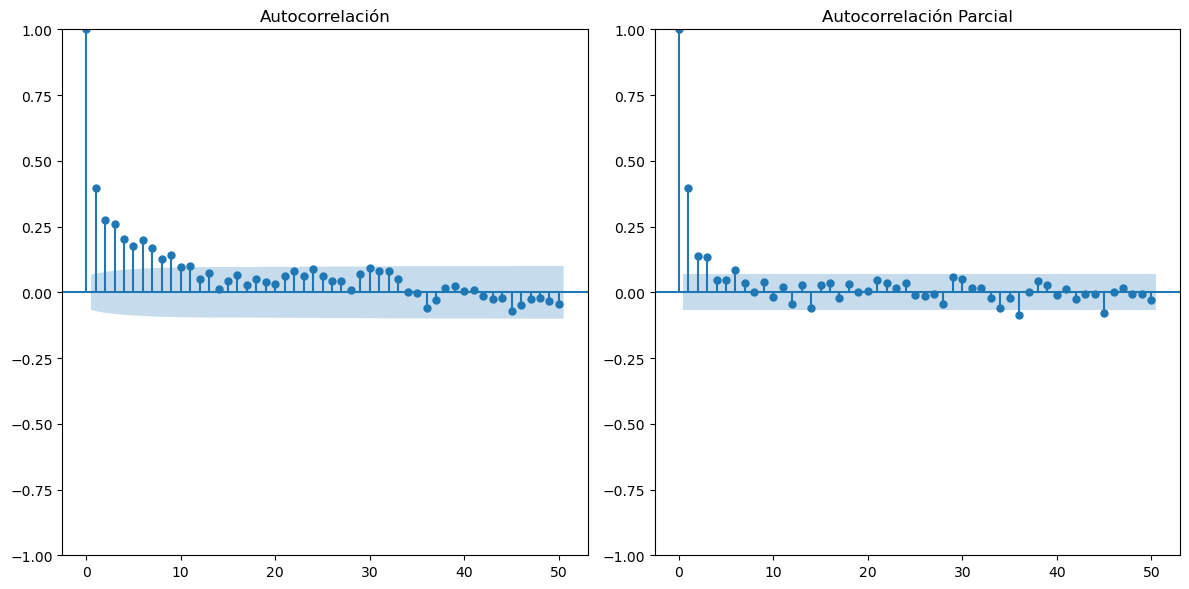

In [115]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Graficar ACF y PACF
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(df_y[col], lags=50, ax=plt.gca(), title="Autocorrelación")
plt.subplot(122)
plot_pacf(df_y[col], lags=50, ax=plt.gca(), title="Autocorrelación Parcial")
plt.tight_layout() 
plt.show()

In [117]:
# Creamos características con rezagos
n_lags = 9
def create_lags(df, col=col, n_lags=9):
    for i in range(1, n_lags + 1):
        df[f'lag_{i}'] = df[col].shift(i)
    return df

In [119]:
df_lags= create_lags(df_y, col, n_lags)
df_lags = df_lags.dropna().reset_index(drop=True)

C:\Users\Cris2\AppData\Local\Temp\ipykernel_17664\2532461119.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'lag_{i}'] = df[col].shift(i)
C:\Users\Cris2\AppData\Local\Temp\ipykernel_17664\2532461119.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'lag_{i}'] = df[col].shift(i)
C:\Users\Cris2\AppData\Local\Temp\ipykernel_17664\2532461119.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [121]:
# 1. Obtener la primera columna
primera_columna = df_lags.iloc[:, 0]

# 2. Eliminar la primera columna del DataFrame original
df_lags = df_lags.iloc[:, 1:]

df_lags[col] = primera_columna
df_lags

,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,au_recuperacion
0,73.376578,66.090970,74.071448,65.392053,70.736983,67.360786,68.335607,63.721450,62.742370,64.673544
1,64.673544,73.376578,66.090970,74.071448,65.392053,70.736983,67.360786,68.335607,63.721450,77.640732
2,77.640732,64.673544,73.376578,66.090970,74.071448,65.392053,70.736983,67.360786,68.335607,73.446119
3,73.446119,77.640732,64.673544,73.376578,66.090970,74.071448,65.392053,70.736983,67.360786,74.824362
4,74.824362,73.446119,77.640732,64.673544,73.376578,66.090970,74.071448,65.392053,70.736983,76.064226
...,...,...,...,...,...,...,...,...,...,...
818,79.307934,79.153353,82.542757,77.849807,77.903909,79.872392,78.773566,78.824656,83.473187,75.920493
819,75.920493,79.307934,79.153353,82.542757,77.849807,77.903909,79.872392,78.773566,78.824656,83.961391
820,83.961391,75.920493,79.307934,79.153353,82.542757,77.849807,77.903909,79.872392,78.773566,82.811343
821,82.811343,83.961391,75.920493,79.307934,79.153353,82.542757,77.849807,77.903909,79.872392,87.899513


In [53]:
def train_val_test_split(df, tr_size=0.8, vl_size=0.1, ts_size=0.1):
    #Definimos el numero de datos en cada subserie
    N = df.shape[0]
    Ntrain = int(tr_size*N)
    Nval = int(vl_size*N)
    Ntst = N - Ntrain - Nval

    # Realizar particion
    train = df[0:Ntrain]
    val = df[Ntrain:Ntrain+Nval]
    test = df[Ntrain+Nval:]

    return train, val, test

In [55]:
tr, vl, ts = train_val_test_split(df_final_para_modelo)
print(f"tam set de entrenamiento: {tr.shape}")
print(f"tam set de validacion: {vl.shape}")
print(f"tam set de test: {ts.shape}")

tam set de entrenamiento: (331, 46)
tam set de validacion: (41, 46)
tam set de test: (42, 46)


In [57]:
import numpy as np

def crear_dataset_supervisado(array, input_length, output_length):
    '''Permite crear un dataset con las entradas (X) y salidas (Y)
    requeridas por la Red LSTM.

    Parámetros:
    - array: arreglo numpy de tamaño N x features (N: cantidad de datos,
      f: cantidad de features)
    - input_length: instantes de tiempo consecutivos de la(s) serie(s) de tiempo
      usados para alimentar el modelo
    - output_length: instantes de tiempo a pronosticar (salida del modelo)
    '''

    # Inicialización
    X, Y = [], []    # Listados que contendrán los datos de entrada y salida del modelo
    shape = array.shape
    if len(shape)==1: # Si tenemos sólo una serie (univariado)
        fils, cols = array.shape[0], 1
        array = array.reshape(fils,cols)
    else: # Multivariado 
        fils, cols = array.shape

    # Generar los arreglos
    for i in range(fils-input_length-output_length):
        X.append(array[i:i+INPUT_LENGTH,0:cols])
        Y.append(array[i+input_length:i+input_length+output_length,-1].reshape(output_length,1))
    
    # Convertir listas a arreglos de NumPy
    X = np.array(X)
    Y = np.array(Y)
    
    return X, Y

In [59]:
# Crear los datasets de entrenamiento, prueba y validación y verificar sus tamaños
INPUT_LENGTH = 7  # Hiperparámetro
OUTPUT_LENGTH = 7    # Modelo multi-step

x_tr, y_tr = crear_dataset_supervisado(tr.values, INPUT_LENGTH, OUTPUT_LENGTH)
x_vl, y_vl = crear_dataset_supervisado(vl.values, INPUT_LENGTH, OUTPUT_LENGTH)
x_ts, y_ts = crear_dataset_supervisado(ts.values, INPUT_LENGTH, OUTPUT_LENGTH)

# Imprimir información en pantalla
print('Tamaños entrada (BATCHES x INPUT_LENGTH x FEATURES) y de salida (BATCHES x OUTPUT_LENGTH x FEATURES)')
print(f'Set de entrenamiento - x_tr: {x_tr.shape}, y_tr: {y_tr.shape}')
print(f'Set de validación - x_vl: {x_vl.shape}, y_vl: {y_vl.shape}')
print(f'Set de prueba - x_ts: {x_ts.shape}, y_ts: {y_ts.shape}')

Tamaños entrada (BATCHES x INPUT_LENGTH x FEATURES) y de salida (BATCHES x OUTPUT_LENGTH x FEATURES)
Set de entrenamiento - x_tr: (317, 7, 46), y_tr: (317, 7, 1)
Set de validación - x_vl: (27, 7, 46), y_vl: (27, 7, 1)
Set de prueba - x_ts: (28, 7, 46), y_ts: (28, 7, 1)


In [69]:
from sklearn.preprocessing import MinMaxScaler

def escalar_dataset(data_input, col_ref):
    '''Escala el dataset en el rango de -1 a 1.

    Entradas:
    - data_input: diccionario con los dataset de entrada y salida del modelo
    (data_input = {'x_tr':x_tr, 'y_tr':y_tr, 'x_vl':x_vl, 'y_vl':y_vl,
                    'y_ts':y_ts})
    - col_ref: parámetro adicional para especificar la columna que contiene
      la variable a predecir

    
    Retorna:
    - data_scaled: diccionario con los datasets de entrada y salida escalados
      (tiene la misma estructura del diccionario de entrada)
    - scaler: el escalador usado (requerido para las predicciones)
    '''

    # *** Implementación adicional: determinar el índice de la columna
    # que contiene la variable a predecir
    col_ref = df_final_para_modelo.columns.get_loc(columna_a_analizar)

    # Número de instantes de tiempo de entrada y de covariables
    NSAMPLES = data_input['x_tr'].shape[1]
    NFEATS = data_input['x_tr'].shape[2]

    # Generar listado con "scalers" (1 por cada covariable de entrada)
    scalers = [MinMaxScaler(feature_range=(-1,1)) for i in range(NFEATS)]

    # Arreglos que contendrán los datasets escalados
    x_tr_s = np.zeros(data_input['x_tr'].shape)
    x_vl_s = np.zeros(data_input['x_vl'].shape)
    x_ts_s = np.zeros(data_input['x_ts'].shape)
    y_tr_s = np.zeros(data_input['y_tr'].shape)
    y_vl_s = np.zeros(data_input['y_vl'].shape)
    y_ts_s = np.zeros(data_input['y_ts'].shape)

    # Escalamiento: se usarán los min/max del set de entrenamiento para
    # escalar la totalidad de los datasets

    # Escalamiento Xs
    for i in range(NFEATS):
        x_tr_s[:,:,i] = scalers[i].fit_transform(x_tr[:,:,i])
        x_vl_s[:,:,i] = scalers[i].transform(x_vl[:,:,i])
        x_ts_s[:,:,i] = scalers[i].transform(x_ts[:,:,i])
    
    # Escalamiento Ys (teniendo en cuenta "col_ind")
    y_tr_s[:,:,0] = scalers[col_ref].fit_transform(y_tr[:,:,0])
    y_vl_s[:,:,0] = scalers[col_ref].transform(y_vl[:,:,0])
    y_ts_s[:,:,0] = scalers[col_ref].transform(y_ts[:,:,0])

    # Conformar diccionario de salida
    data_scaled = {
        'x_tr_s': x_tr_s, 'y_tr_s': y_tr_s,
        'x_vl_s': x_vl_s, 'y_vl_s': y_vl_s,
        'x_ts_s': x_ts_s, 'y_ts_s': y_ts_s,
    }

    return data_scaled, scalers[col_ref]

In [71]:
# Escalamiento del dataset con la función anterior

# Crear diccionario de entrada
data_in = {
    'x_tr': x_tr, 'y_tr': y_tr,
    'x_vl': x_vl, 'y_vl': y_vl,
    'x_ts': x_ts, 'y_ts': y_ts,
}

# Y escalar (especificando la columna con la variable a predecir)
data_s, scaler = escalar_dataset(data_in, col_ref = col)

# Extraer subsets escalados
x_tr_s, y_tr_s = data_s['x_tr_s'], data_s['y_tr_s']
x_vl_s, y_vl_s = data_s['x_vl_s'], data_s['y_vl_s']
x_ts_s, y_ts_s = data_s['x_ts_s'], data_s['y_ts_s']

x_tr_s.shape


(317, 7, 46)

ValueError: The number of FixedLocator locations (13), usually from a call to set_ticks, does not match the number of labels (62).

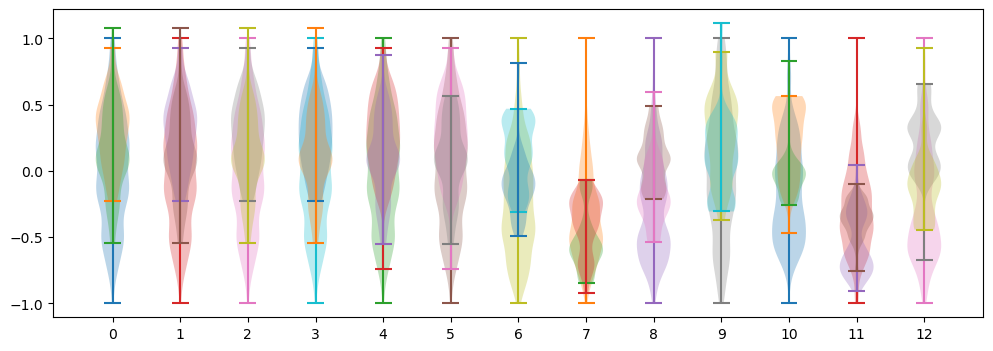

In [73]:
# Y generemos una gráfica tipo violín para ver la distribución
# de los valores en cada covariable (entrada) y en la variable a
# predecir (salida)

fig, ax = plt.subplots(figsize=(12,4))
for i in range(13):
    ax.violinplot(dataset=x_tr_s[:,:,i].flatten(), positions=[i])
    ax.violinplot(dataset=x_vl_s[:,:,i].flatten(), positions=[i])
    ax.violinplot(dataset=x_ts_s[:,:,i].flatten(), positions=[i])

# Etiquetas eje horizontal
ax.set_xticks(list(range(13)))
ax.set_xticklabels(df.keys(), rotation=90)
ax.autoscale();

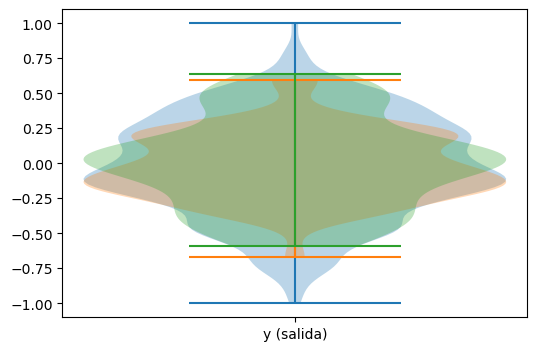

In [75]:
# Y hagamos lo mismo con la variable de salida:
fig, ax = plt.subplots(figsize=(6,4))
ax.violinplot(dataset=y_tr_s.flatten())
ax.violinplot(dataset=y_vl_s.flatten())
ax.violinplot(dataset=y_ts_s.flatten())
ax.set_xticks([1])
ax.set_xticklabels(['y (salida)']);

## Recomendaciones
1. Tomarlo por mineral
2. Entrenar solo para Recuperaciones y Leyes
3. Probar otros modelos que no sean de Deep Learning (por el tiempo y conocimiento)
4. Intentar Regresion Lineal y Logistica
5. Utilizar un Regresor Random Forest
6. Investigar el escalamiento por feature, investigar como hace el escalamiento el StandardScaler
7. Probar con los 0s en el ajuste
8. Quitar las columnas con valores faltantes y probar el ajuste
9. En vez de ser data augmentation el lag debe servir para el mantenimiento del modelo (lag de features)

## Entrenamiento del Modelo

## Opcion 1:

In [27]:
# Creación del modelo
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import RMSprop, Adam
import tensorflow as tf

# Ajustar parámetros para reproducibilidad del entrenamiento
tf.random.set_seed(123)
tf.config.experimental.enable_op_determinism()

## Son demasiadas unidades REVISAR
# El modelo
N_UNITS = 32 # Tamaño del estado oculto (h) y de la celdad de memoria (c) (128)
INPUT_SHAPE = (x_tr_s.shape[1], x_tr_s.shape[2]) # 5 dias x 45 (features)

modelo = Sequential()
modelo.add(LSTM(N_UNITS, input_shape=INPUT_SHAPE))

modelo.add(Dense(OUTPUT_LENGTH, activation='linear')) # activation = 'linear' pues queremos pronosticar (regresión)
# Pérdida: se usará el RMSE (root mean squared error) para el entrenamiento
# pues permite tener errores en las mismas unidades
def root_mean_squared_error(y_true, y_pred):
    rmse = tf.math.sqrt(tf.math.reduce_mean(tf.square(y_pred-y_true)))
    return rmse

# Compilación
optimizador = RMSprop(learning_rate=5e-4) # 5e-5
modelo.compile(
    optimizer = optimizador,
    loss = root_mean_squared_error,
)

# Entrenamiento (aproximadamente 1 min usando GPU)
EPOCHS = 200 # Hiperparámetro
BATCH_SIZE = 128 # Hiperparámetro
historia = modelo.fit(
    x = x_tr_s,
    y = y_tr_s,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    validation_data = (x_vl_s, y_vl_s),
    verbose=2
)

Epoch 1/200


D:\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 - 2s - 468ms/step - loss: 0.4300 - val_loss: 0.3158
Epoch 2/200
4/4 - 0s - 24ms/step - loss: 0.3789 - val_loss: 0.2885
Epoch 3/200
4/4 - 0s - 25ms/step - loss: 0.3484 - val_loss: 0.2689
Epoch 4/200
4/4 - 0s - 26ms/step - loss: 0.3265 - val_loss: 0.2538
Epoch 5/200
4/4 - 0s - 25ms/step - loss: 0.3106 - val_loss: 0.2419
Epoch 6/200
4/4 - 0s - 24ms/step - loss: 0.2994 - val_loss: 0.2325
Epoch 7/200
4/4 - 0s - 25ms/step - loss: 0.2917 - val_loss: 0.2252
Epoch 8/200
4/4 - 0s - 25ms/step - loss: 0.2864 - val_loss: 0.2194
Epoch 9/200
4/4 - 0s - 24ms/step - loss: 0.2826 - val_loss: 0.2150
Epoch 10/200
4/4 - 0s - 24ms/step - loss: 0.2797 - val_loss: 0.2114
Epoch 11/200
4/4 - 0s - 25ms/step - loss: 0.2773 - val_loss: 0.2086
Epoch 12/200
4/4 - 0s - 26ms/step - loss: 0.2754 - val_loss: 0.2061
Epoch 13/200
4/4 - 0s - 24ms/step - loss: 0.2736 - val_loss: 0.2039
Epoch 14/200
4/4 - 0s - 25ms/step - loss: 0.2720 - val_loss: 0.2019
Epoch 15/200
4/4 - 0s - 25ms/step - loss: 0.2706 - val_loss: 0.1999


## Opcion 2 

In [ ]:
# Creación del modelo
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import RMSprop, Adam
import tensorflow as tf

# Ajustar parámetros para reproducibilidad del entrenamiento
tf.random.set_seed(123)
tf.config.experimental.enable_op_determinism()

# El modelo
N_UNITS = 128 # Tamaño del estado oculto (h) y de la celdad de memoria (c) (128)
INPUT_SHAPE = (x_tr_s.shape[1], x_tr_s.shape[2]) # 5 dias x 45 (features)

modelo = Sequential()
modelo.add(LSTM(N_UNITS, input_shape=INPUT_SHAPE))

# Jugar con esta funcion de activacion
modelo.add(Dense(OUTPUT_LENGTH, activation='linear')) # activation = 'linear' pues queremos pronosticar (regresión)
# Agregar mas capas y mas numero de neuronas


# Pérdida: se usará el RMSE (root mean squared error) para el entrenamiento
# pues permite tener errores en las mismas unidades
def root_mean_squared_error(y_true, y_pred):
    rmse = tf.math.sqrt(tf.math.reduce_mean(tf.square(y_pred-y_true)))
    return rmse

# Compilación
optimizador = RMSprop(learning_rate=0.01) # 5e-5
modelo.compile(
    optimizer = optimizador,
    loss = root_mean_squared_error,
)

# Entrenamiento (aproximadamente 1 min usando GPU)
EPOCHS = 100 # Hiperparámetro
BATCH_SIZE = 128 # Hiperparámetro
historia = modelo.fit(
    x = x_tr_s,
    y = y_tr_s,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    validation_data = (x_vl_s, y_vl_s),
    verbose=2
)

## Opcion 3

In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, LayerNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

# Configurar reproducibilidad
tf.random.set_seed(123)
tf.config.experimental.enable_op_determinism()

# Hiperparámetros ajustados para pocos datos
N_UNITS = 8 # Reducir capacidad para evitar overfitting
DROPOUT_RATE = 0.3  # Regularización
LEARNING_RATE = 0.001  # Tasa de aprendizaje más baja
BATCH_SIZE = 4  # Batch pequeño para mejor generalización
EPOCHS = 200
INPUT_SHAPE = (x_tr_s.shape[1], x_tr_s.shape[2])  # (time_steps, n_features)

# Arquitectura
modelo = Sequential([
    # Capa LSTM con regularización
    LSTM(
        N_UNITS, 
        input_shape=INPUT_SHAPE,
        kernel_regularizer=tf.keras.regularizers.l2(1e-4),
        return_sequences=False  # Solo última salida
    ),
    LayerNormalization(),  # Estabiliza entrenamiento
    Dropout(DROPOUT_RATE),
    
    # Capa de salida
    Dense(OUTPUT_LENGTH, activation='linear')
])

# Función de pérdida
def root_mean_squared_error(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))

# Optimizador con decaimiento de tasa de aprendizaje
optimizador = Adam(
    learning_rate=LEARNING_RATE, 
    beta_1=0.9, 
    beta_2=0.999, 
    decay=1e-6
)

# Early Stopping para evitar overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True
)

# Compilación
modelo.compile(
    optimizer=optimizador,
    loss=root_mean_squared_error
)

# Entrenamiento con aumento de datos en tiempo real
historia = modelo.fit(
    x=x_tr_s,
    y=y_tr_s,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(x_vl_s, y_vl_s),
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/200


D:\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
D:\anaconda3\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.0855 - val_loss: 0.9099
Epoch 2/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6499 - val_loss: 0.8177
Epoch 3/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5169 - val_loss: 0.7461
Epoch 4/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4650 - val_loss: 0.7065
Epoch 5/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4151 - val_loss: 0.6680
Epoch 6/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3996 - val_loss: 0.6383
Epoch 7/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3669 - val_loss: 0.6157
Epoch 8/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3593 - val_loss: 0.6053
Epoch 9/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3571 - val_loss: 0.5858
Epoch 10/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3473 - val_loss: 0.5747
Epoch 11/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3402 - val_loss: 0.5707
Epoch 12/200
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3452 - val_lo

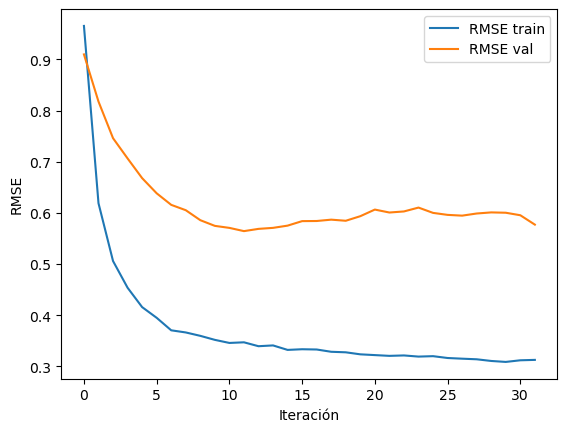

In [79]:
 # Graficar curvas de entrenamiento y validación
 # para verificar que no existe overfitting
plt.plot(historia.history['loss'],label='RMSE train')
plt.plot(historia.history['val_loss'],label='RMSE val')
plt.xlabel('Iteración')
plt.ylabel('RMSE')
plt.legend();

## Evaluacion del modelo

In [82]:
# Cálculo de rmses para train, val y test
rmse_tr = modelo.evaluate(x=x_tr_s, y=y_tr_s, verbose=0)
rmse_vl = modelo.evaluate(x=x_vl_s, y=y_vl_s, verbose=0)
rmse_ts = modelo.evaluate(x=x_ts_s, y=y_ts_s, verbose=0)

# Imprimir resultados en pantalla
print('Comparativo desempeños:')
print(f'  RMSE train:\t {rmse_tr:.3f}')
print(f'  RMSE val:\t {rmse_vl:.3f}')
print(f'  RMSE test:\t {rmse_ts:.3f}')

Comparativo desempeños:
  RMSE train:	 0.333
  RMSE val:	 0.570
  RMSE test:	 0.574


Forma de y_ts_s: (28, 7, 1)
Forma de y_ts_pred_s: (28, 7)


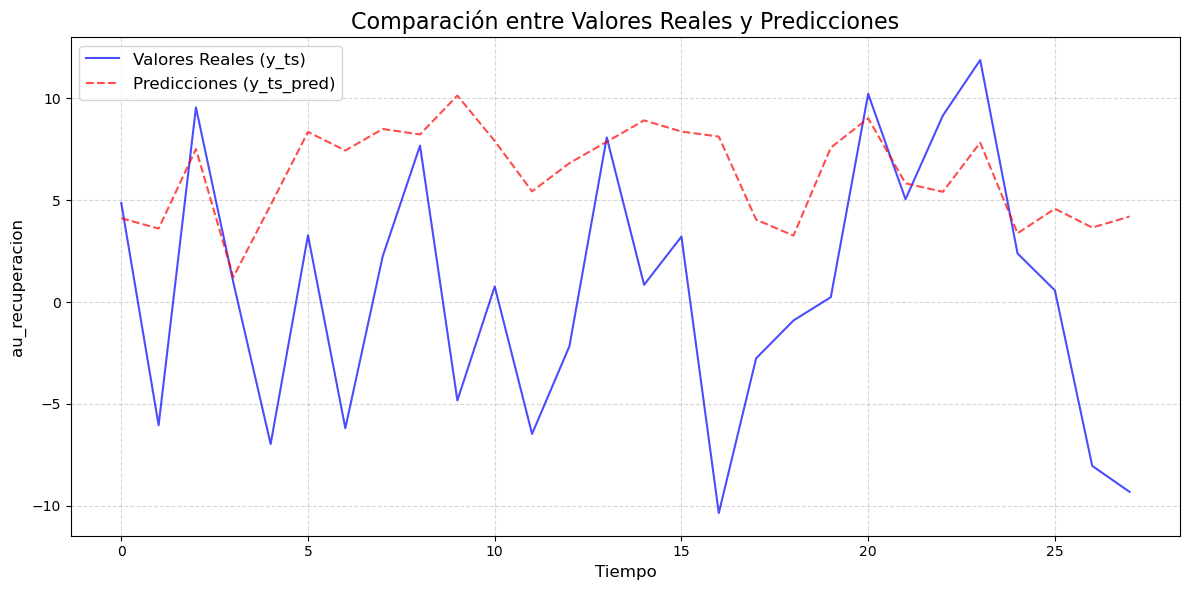

In [84]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Generar las predicciones sobre el set de prueba
y_ts_pred_s = modelo.predict(x_ts_s, verbose=0)

# 2. Verificar las formas de los arrays
print(f"Forma de y_ts_s: {y_ts_s.shape}")
print(f"Forma de y_ts_pred_s: {y_ts_pred_s.shape}")

# 3. Ajustar las formas si es necesario
if len(y_ts_s.shape) == 3:
    y_ts_s = np.squeeze(y_ts_s, axis=-1)
if len(y_ts_pred_s.shape) == 3:
    y_ts_pred_s = np.squeeze(y_ts_pred_s, axis=-1)

# 4. Realizar la transformación inversa de las predicciones
y_ts_original = scaler.inverse_transform(y_ts_s)
y_ts_pred = scaler.inverse_transform(y_ts_pred_s)

# 5. Graficar los datos de prueba y las predicciones
plt.figure(figsize=(12, 6))

# Graficar los datos de prueba (valores reales)
plt.plot(y_ts_original[:, 0], label='Valores Reales (y_ts)', color='blue', alpha=0.7)

# Graficar las predicciones del modelo
plt.plot(y_ts_pred[:, 0], label='Predicciones (y_ts_pred)', color='red', linestyle='--', alpha=0.7)

# Personalizar la gráfica
plt.title('Comparación entre Valores Reales y Predicciones', fontsize=16)
plt.xlabel('Tiempo', fontsize=12)
plt.ylabel('au_recuperacion', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Mostrar la gráfica
plt.show()

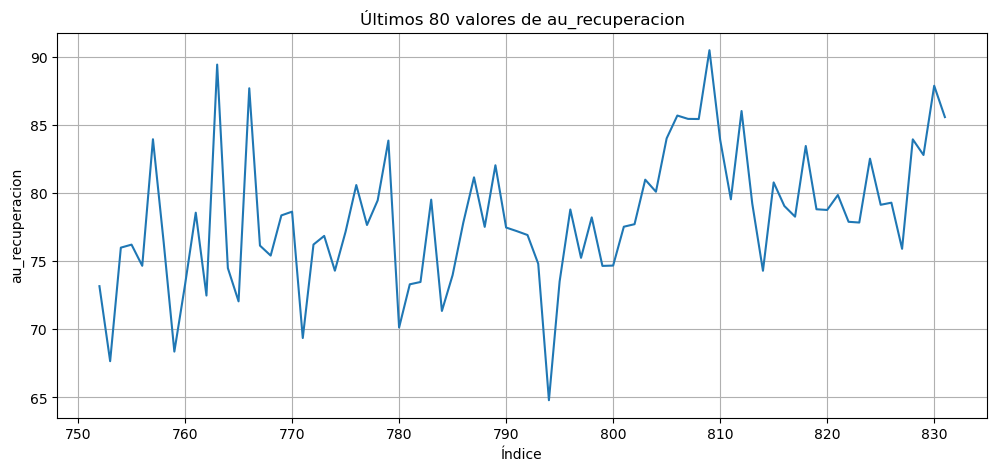

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reemplaza "zn_recuperacion" si deseas otra columna

# Graficar los últimos 80 valores
df[col].tail(80).plot(figsize=(12, 5), title=f"Últimos 80 valores de {col}")
plt.xlabel("Índice")
plt.ylabel(col)
plt.grid(True)
plt.show()


In [88]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_ts_s.reshape(-1, 1), y_ts_pred_s.reshape(-1, 1))
print(f'MSE: {mse}')

MSE: 0.32499023626715007


In [90]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_ts_s.reshape(-1, 1), y_ts_pred_s.reshape(-1, 1))
print(f'MAE: {mae}')

MAE: 0.4519689883848043


In [92]:
from sklearn.metrics import r2_score

r2 = r2_score(y_ts_s.reshape(-1, 1), y_ts_pred_s.reshape(-1, 1))
print(f'R²: {r2}')

R²: -1.9949708005381472


In [94]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_ts_s.reshape(-1, 1), y_ts_pred_s.reshape(-1, 1))
print(f'MAPE: {mape}%')

MAPE: 2555.0557763904767%
